# **chapter04 다양한 분류 알고리즘**

## **04-1 로지스틱 회귀**


럭키백의 확률을 계산하라!

In [10]:
# 데이터 준비하기

import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


**데이터 프레임이 뭔가요?**

2차원표 형식의 주요 데이터 구조 

통계와 그래프를 위한 메서드를 풍부하게 제공하며, 넘파이로 상호변환이 쉽고 사이킷런과도 잘 호환됨:)

In [11]:
print(pd.unique(fish['Species']))  # Species열에서 고유값 추출 - 판다스의 unique()함수를 사용

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()  
# 넘파이 배열로 바꾸어 fish_iput에 저장

In [5]:
print(fish_input[:5])  # fish_input에 5개의 행 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
fish_target = fish['Species'].to_numpy()   # 넘파이 배열로 바꾸어 fish_target에 저장

In [9]:
from sklearn.model_selection import train_test_split  # 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler  # 훈련세트와 테스트 세트를 표준화 전처리하기
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

k-최근접 이웃 분류기의 확률 예측

In [14]:
from sklearn.neighbors import KNeighborsClassifier  # KNeighborsClassifier 클래스 객체 만들고 훈련 세트와 테스트 세트 확인
kn = KNeighborsClassifier(n_neighbors=3) # 최근접 이웃 개수 k를 3으로 지정         
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [15]:
print(kn.classes_)  # KNeighborsClassifier에서 정렬된 타깃값은 classes_속성에 저장

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [16]:
print(kn.predict(test_scaled[:5]))  # predict() 메서드는 친절하게 타깃값으로 예측을 출력, 처음 5개 샘플의 타깃값을 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [17]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])  # classes_속상과 같은 predict_proba()
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [18]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


# **로지스틱 회귀**

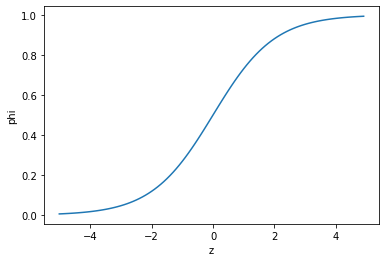

In [19]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## **로지스틱 회귀로 이진 분류 수행하기**

이진분류인 경우 시그모이드 함수의 출력이 

'>0.5 양성클래스, <0.5 음성 클래스 

'=0.5일 경우 라이브러리마다 다르다! 사이킷런은 음성

**불리언 인덱싱(boolean indexing) = 넘파이 배열은 True, False 값**

In [20]:
# 불리언 인덱싱(boolean indexing)
# 5개의 원소로 이루어진 배열 중 A, C 만 골라내기
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [21]:
# 불리언 인덱싱으로 도미(Bream)와 빙어(Smelt)의 행만 골라내기
# 비교 결과를 비트 or 연산자(|)를 사용해 합치면 골라낼 수 있다.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

# bream_smelt_indexes 배열은 도미와 비어일 경우 True, 그 외에는 False

In [24]:
# 도미와 빙어만 골라낸 데이터로 로지스틱 회귀 모델 훈련하기
# LogisticRegression 클래스는 선형 모델이므로 sklearn.linear_model 패키지에 존재

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# 훈련한 모델을 사용해 처음 5개 샘플 예측하기
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [26]:
# predict_proba() 메서드를 통해 5개 샘플에 대한 예측 확률 출력
# 첫번째 열이 음성클래스(0)에 대한 확률, 두번째 열이 양성큻래스(1)
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [27]:
# 첫번째 열 0은 뭐고 1은 뭘까.
# 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용- 속성확인으로 확인해보자
print(lr.classes_)

['Bream' 'Smelt']


In [28]:
# 선형 회귀처럼 로지스틱 회귀가 학습한 계수 확인하기
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [29]:
# LogisticRegression 클래스는 decision_function()메서드로 z값을 출력할 수 있다!
# 처음 5개 샘플의 z 값을 출력해보자

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# 이 z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음
# 다행히 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수-expit() 함수가 있음.
# np.exp()함수를 사용해 분수 계산을 하는 것보다 훨씬 편리하고 안전함

In [30]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
# 출력된 값을 보면 predict_proba() 메서드 출력의 두 번째 열의 값과 동일함
# 즉, decision_function() 메서드는 양성 클래스에 대한 z 값을 반환함



## **로지스틱 회귀로 다중 분류 수행하기**

이진분류와의 차이점을 알아보자

LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함.

 - max_iter 매개변수에서 반복횟수를 지정(100은 부족, 1,000으로 변경)


LogisticRegresiion은 기본적으로 릿지 회귀와 같이 계수로 제곱을 규제함

 - 이런 규제를 'L2 규제'라고 함.

 - 매개변수 C, 작을수록 규제가 커짐. C의 기본값은 1

In [31]:
# 규제를 완화하기 위해 C를 20으로 늘림
# 7개의 생선 데이터가 모두 들어있는 리스트 사용
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [32]:
# 훈련 세트와 테스트 세트가 과대적합이나 과소적합이 아닌 것으로 보여짐.
# 테스트 세트의 처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [33]:
# 처음 5개 샘플에 대한 예측 확률을 출력
# 출력을 간소하게 하기 위해 소수점 네번째 자리에서 반올림
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [34]:
# 7개 생선에 대한 확률이므로 7개의 열이 출력됨.

# 출력한 5개 샘플들의 클래스 정보 확인하기
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [35]:
# 다중 분류일 경우 선형 방정식은 어떠한 모습일까?
# coef_intercept_의 크기를 출력해보자
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [36]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
# 5개 특성을 사용하므로 coef_배열의 열은 5개다
# 행이 7개란 말은 이진 분류에서 보았던 z를 7개나 계산한다.
# 다중 분류는 클래스마다 z 값을 하나씩 계산한다. 

# 이진 분류는 z를 0~1사이의 값으로 변환, 
# 다중 분류는 소프트맥스함수를 사용하여 7개의 z값을 확률로 변환함.

In [37]:
# 사이파이는 소프트맥스 함수도 제공함
# scipy.special 아래에 softmax() 함수를 임포트해 사용함
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# decision 배열을 softmax() 함수에 전달함
# softmax() 의 axis 매개변수는 소프트 맥스를 계산할 축을 지정
# 만약 axis 매개변수를 지정하지 않으면 배열 전체에 대한 소프트 맥스를 계산함. 

##**04-2 확률적 경사 하강법**


**SGDClassifier**

In [38]:
import pandas as pd  # fish_csv_data 파일에서 판다스 데이터프레임을 만듦
fish = pd.read_csv('https://bit.ly/fish_csv')

In [39]:
# Species 열을 제외한 나머지 5개 입력 데이터로 사용. Species 열은 타깃데이터임.
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [40]:
# 사이킷런의 train_test_split() 함수를 사용해 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [41]:
# 훈련 세트와 테스트 세트의 특성을 표준화 전처리함
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [42]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스 SGDClassifier
from sklearn.linear_model import SGDClassifier

In [44]:
# loss는 손실 함수의 종류 지정, loss='log'로 지정하여 로지스틱 손실 함수를 지정
# max_iter는 수행해야할 에포크 횟수를 지정함
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


ConvergenceWarning경고 - 모델이 충분히 수렴하지 않았다고 경고를 보냄. 

이런 경고 시 max_iter 매개변수의 값을 늘려주는 것이 좋음.

In [45]:
# 모델을 이어서 추가 훈련을 할 때에는 partial_fit() 메서도 사용
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target)) 

0.8151260504201681
0.825


**에포크와 과대/과소적합**

In [47]:
# 준비한 데이터 셋으로 그래프 만들기
# partial_fit()메서드 사용하여 2개의 리스트 준비
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score =[]
test_score = []
classes = np.unique(train_target)

In [49]:
# 300번의 에포크 동안 훈련을 반복하여 진행
# 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 리스트에 추가
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

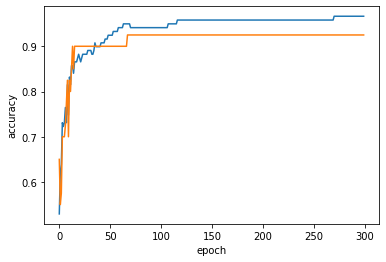

In [50]:
# 300번의 에포크 동안 기록한 점수 그래프로 그리기
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [51]:
# 데이터가 작기 때문에 잘 드러나지 않지만,
# 백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어짐.

# SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련, 출력

In [52]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [53]:
# 훈련 세트와 테스트 세트에서의 정확도 점수가 비교적 높게 나옴
# 확률적 경사 하강법을 사용한 생선 분류 문제도 성공적으로 수행!

# SGDClassifier의 loss 매개변수- 'hinge'
# 힌지 손실(hinge loss), 서포트 벡터머신이라 불리는 또다른 머신러닝 알고리즘을 위한 손실함수 

In [54]:
# 힌지 손실을 사용해 같은 반복 횟수 동안 모델을 훈련
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
